In [242]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras import Input
from tensorflow.data import Dataset
import pandas as pd
import numpy as np
import itertools
import csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [243]:
df = pd.read_csv('new_way.csv')
df['action'].count()

527

In [244]:
x = df.drop('action',axis=1)
y = df.action

In [245]:
y

0       fel
1       fel
2       fel
3       fel
4       fel
       ... 
522    zero
523    zero
524    zero
525    zero
526    zero
Name: action, Length: 527, dtype: object

In [246]:
lb = LabelEncoder()
y = lb.fit_transform(y)
df['label'] = y
df

,action,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,label
0,fel,-381.349396,-269.253387,-116.813377,-45.249886,-256.332245,-89.417160,150.056244,-87.576866,42.188335,242.867905,18.962461,76.399940,428.462341,293.971802,641.771301,1
1,fel,-376.021545,-272.967926,-133.821198,-61.291061,-241.356766,-93.077553,143.094406,-77.135376,34.819637,215.708588,6.728501,58.470631,418.830933,280.534210,641.699524,1
2,fel,-371.472626,-270.972260,-142.165512,-33.497070,-232.640335,-80.189026,160.922134,-66.725060,54.446323,238.968887,23.842035,79.471870,418.830933,280.534210,641.699524,1
3,fel,-391.170746,-288.454712,-141.190826,-53.679672,-241.145935,-96.715271,129.194000,-86.305061,32.738186,215.872284,5.572473,62.609039,418.830933,280.534210,641.699524,1
4,fel,-397.024536,-299.664978,-151.170349,-70.518257,-250.302734,-106.209557,120.442680,-91.443016,24.323040,206.199936,-0.270382,53.590782,418.830933,280.534210,641.699524,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,zero,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
523,zero,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
524,zero,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
525,zero,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3


In [247]:
lb.classes_

array(['boink', 'fel', 'nine', 'zero'], dtype=object)

In [248]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [249]:
y_train

array([2, 1, 2, 3, 1, 2, 0, 1, 0, 0, 3, 3, 3, 3, 0, 1, 2, 2, 2, 3, 0, 0,
       2, 0, 3, 2, 2, 1, 1, 2, 3, 1, 0, 2, 2, 0, 1, 2, 3, 1, 0, 3, 3, 2,
       1, 1, 3, 0, 1, 1, 3, 1, 0, 3, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1,
       0, 0, 1, 1, 3, 0, 1, 2, 3, 1, 0, 1, 0, 0, 0, 1, 0, 3, 1, 1, 0, 3,
       3, 3, 0, 1, 1, 0, 2, 0, 3, 0, 2, 0, 0, 3, 0, 0, 0, 1, 3, 3, 0, 0,
       2, 2, 1, 3, 3, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 3, 2, 2, 3, 0, 3, 2,
       2, 3, 0, 1, 1, 0, 2, 0, 0, 3, 2, 3, 3, 2, 3, 2, 0, 0, 0, 0, 0, 0,
       1, 1, 3, 0, 2, 2, 1, 1, 3, 0, 0, 2, 3, 1, 2, 2, 2, 0, 0, 0, 2, 1,
       2, 0, 2, 2, 0, 3, 3, 2, 1, 0, 3, 0, 3, 3, 1, 3, 3, 2, 0, 0, 2, 1,
       1, 2, 3, 3, 1, 1, 2, 2, 3, 2, 3, 3, 2, 2, 1, 1, 3, 1, 2, 1, 2, 2,
       0, 0, 0, 3, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 2, 1, 3, 3, 0, 0, 0, 3, 3, 3, 2, 3, 1, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 1, 3, 2, 0, 0, 0, 3, 2, 2, 1, 3, 0, 0, 0, 3, 1,
       0, 3, 2, 0, 0, 1, 1, 0, 2, 1, 2, 3, 3, 1, 0,

In [250]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [251]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((421, 15), (106, 15), (421, 4), (106, 4))

In [253]:
model = Sequential()
model.add(Input(shape=(15)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation="softmax"))

In [254]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 64)                1024      
                                                                 
 dense_72 (Dense)            (None, 4)                 260       
                                                                 
Total params: 1,284
Trainable params: 1,284
Non-trainable params: 0
_________________________________________________________________


In [255]:
history = model.fit(
    x_train,
    y_train,
    steps_per_epoch = 5,
    epochs = 40,
    validation_data = (x_test, y_test),
    verbose=1
)

Epoch 1/40
5/5 [==============================] - 0s 32ms/step - loss: 482.0336 - accuracy: 0.0000e+00 - val_loss: 369.9209 - val_accuracy: 0.0000e+00
Epoch 2/40
5/5 [==============================] - 0s 7ms/step - loss: 300.8373 - accuracy: 0.0855 - val_loss: 242.2207 - val_accuracy: 0.2170
Epoch 3/40
5/5 [==============================] - 0s 6ms/step - loss: 211.2824 - accuracy: 0.2185 - val_loss: 177.5417 - val_accuracy: 0.2170
Epoch 4/40
5/5 [==============================] - 0s 6ms/step - loss: 145.5587 - accuracy: 0.2565 - val_loss: 109.6084 - val_accuracy: 0.3491
Epoch 5/40
5/5 [==============================] - 0s 7ms/step - loss: 83.0402 - accuracy: 0.3777 - val_loss: 49.3219 - val_accuracy: 0.3585
Epoch 6/40
5/5 [==============================] - 0s 6ms/step - loss: 25.0422 - accuracy: 0.4109 - val_loss: 0.6166 - val_accuracy: 0.7170
Epoch 7/40
5/5 [==============================] - 0s 6ms/step - loss: 0.5971 - accuracy: 0.7648 - val_loss: 0.3177 - val_accuracy: 0.7736
Epoch 

In [256]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

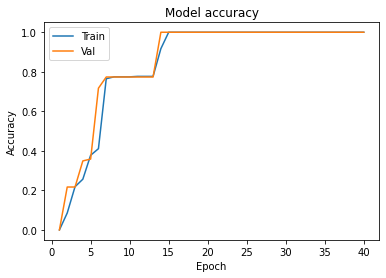

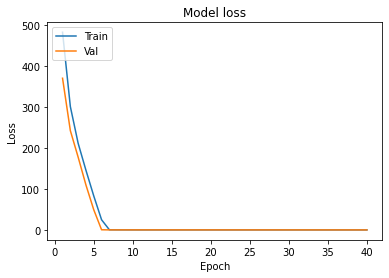

In [257]:
plot_learningCurve(history, 40)

In [ ]:
test_X = np.array([
    [-406.325867,-327.913513,-169.621292,-105.695808,-266.762054,-112.666458,68.620850,-135.545349,3.377147,180.597488,-28.868486,43.224567,418.830933,280.534210,641.699524],
    [1320.943481,1054.197388,1277.395508,-316.596161,-115.715225,645.914490,-293.359589,-117.338379,746.761230,-185.270874,60.773712,834.030273,421.568390,282.367767,645.893616],
    [-383.235077,-311.100037,-197.631592,-107.004318,-235.231262,-116.203461,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1321.087402,1054.216675,1277.468872,-317.182556,-117.585640,643.408936,-293.577362,-117.764130,746.351929,-187.409271,56.366665,831.326477,421.568390,282.367767,645.893616],
    [1312.798584,1047.551392,1269.233154,-315.396240,-117.270004,638.171997,-291.300446,-116.279694,742.242371,-186.199646,56.229809,825.841125,418.830933,280.534210,641.699524],
    [1312.811523,1047.273438,1269.202637,-315.684814,-117.178726,638.912842,-290.455994,-115.492928,743.165222,-186.414749,55.449490,825.548950,418.830933,280.534210,641.699524],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1312.833130,1047.422729,1269.133179,-315.423615,-117.150795,639.403870,-290.824249,-116.106712,742.619629,-186.572784,55.422165,825.221924,418.830933,280.534210,641.699524],
    [1321.549316,1046.301880,1277.417969,-351.697235,-175.049469,563.982727,-309.408997,-121.954727,722.247742,-218.011322,25.565254,782.218262,421.568390,282.367767,645.893616],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1316.986938,1036.482056,1274.795288,-365.841003,-200.822876,520.388123,-314.164551,-122.020241,707.959534,-229.205444,17.490072,759.195312,418.830933,280.534210,641.699524],
    [1327.660156,1043.612183,1287.544922,-371.495026,-206.819122,515.230835,-318.456543,-121.864571,709.689758,-232.852890,17.775621,759.463318,421.568390,282.367767,645.893616],
    [1320.145386,1036.028320,1280.863159,-372.233978,-209.604691,506.293121,-318.277252,-122.168648,701.931641,-233.700394,15.901367,750.742249,418.830933,280.534210,641.699524],
    [1320.010376,1035.806519,1280.243164,-373.965454,-210.666306,506.634094,-317.075134,-120.870102,703.736511,-234.436981,15.467718,750.518066,418.830933,280.534210,641.699524],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1322.411011,1035.252319,1275.233398,-368.881866,-204.410355,524.392639,-316.768860,-125.999161,711.618896,-233.246735,10.529224,760.487915,421.568390,282.367767,645.893616],
    [1314.253906,1026.764648,1257.505493,-362.358154,-196.420059,542.371033,-312.217865,-129.137466,718.170227,-230.745117,3.968786,766.347595,421.568390,282.367767,645.893616],
    [-370.806702,-296.183807,-180.345581,-110.419876,-240.254776,-118.526176,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616],
    [-371.306366,-294.510223,-181.938309,-130.909012,-249.784012,-132.658234,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616],
    [-383.235077,-311.100037,-197.631592,-107.004318,-235.231262,-116.203461,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616],
    [999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999],
    [999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999],
    [999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999],
    [999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999],
    [999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999],
    [999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999]
])
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
Y = model.predict_on_batch(test_X)
print(Y*100)
# array(['boink', 'fel', 'zero'], dtype=object)

In [ ]:
y_train

In [ ]:
score = metrics.log_loss(y_test, Y)

In [ ]:
test_X = np.array([
    [-371.472626,-270.972260,-142.165512,-33.497070,-232.640335,-80.189026,160.922134,-66.725060,54.446323,238.968887,23.842035,79.471870,418.830933,280.534210,641.699524],
])
Y = model.predict(test_X)
print(Y*100)

In [ ]:
test_X = np.array([
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])
Y = model.predict(test_X)
print(Y*100)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
def representative_dataset_gen():
    for _ in range(10000):
        yield [
            np.array(
                [np.random.uniform(), np.random.uniform()]
            , dtype=np.float32)
        ]
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
tflite_quant_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_quant_model)

In [ ]:
# xxd -i converted_model.tflite > model_data.cc